In [4]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Hackathon_ML-Model/AIML Dataset.csv')

df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
types = list(df.nameOrig.values)

In [ ]:
len(types)

6362620

In [ ]:
unq_type = list(set(types))

len(unq_type)

6353307

In [8]:
df_new = df[[ 'step', 'amount', 'type', 'isFraud']]

df_new

,step,amount,type,isFraud
0,1,9839.64,PAYMENT,0
1,1,1864.28,PAYMENT,0
2,1,181.00,TRANSFER,1
3,1,181.00,CASH_OUT,1
4,1,11668.14,PAYMENT,0
...,...,...,...,...
6362615,743,339682.13,CASH_OUT,1
6362616,743,6311409.28,TRANSFER,1
6362617,743,6311409.28,CASH_OUT,1
6362618,743,850002.52,TRANSFER,1


In [9]:
df_new['type'].replace({'DEBIT': 0,'TRANSFER': 1, 'PAYMENT': 2, "CASH_OUT": 3, "CASH_IN": 4},inplace=True)

df_new

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,step,amount,type,isFraud
0,1,9839.64,2,0
1,1,1864.28,2,0
2,1,181.00,1,1
3,1,181.00,3,1
4,1,11668.14,2,0
...,...,...,...,...
6362615,743,339682.13,3,1
6362616,743,6311409.28,1,1
6362617,743,6311409.28,3,1
6362618,743,850002.52,1,1


In [10]:
cols_to_scale = ['amount']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_new['amount'] = scaler.fit_transform(df_new[['amount']])


df_new

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,step,amount,type,isFraud
0,1,0.000106,2,0
1,1,0.000020,2,0
2,1,0.000002,1,1
3,1,0.000002,3,1
4,1,0.000126,2,0
...,...,...,...,...
6362615,743,0.003674,3,1
6362616,743,0.068272,1,1
6362617,743,0.068272,3,1
6362618,743,0.009195,1,1


In [18]:
temp_df1 = df_new[df_new.isFraud==1]

temp_df2 = df_new[df_new.isFraud==0]

temp_df2 = temp_df2[: 8213 ]

new_df = pd.concat([temp_df1, temp_df2])

new_df

,step,amount,type,isFraud
2,1,0.000002,1,1
3,1,0.000002,3,1
251,1,0.000030,1,1
252,1,0.000030,3,1
680,1,0.000218,1,1
...,...,...,...,...
8274,7,0.000061,2,0
8275,7,0.000005,2,0
8276,7,0.003715,3,0
8277,7,0.002092,4,0


In [19]:
X = new_df.drop('isFraud',axis='columns')
y = new_df['isFraud']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [20]:
X_train.shape

(13140, 3)

In [21]:
X_test.shape

(3286, 3)

In [25]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(3, input_shape=(3,), activation='relu'),
    keras.layers.Dense(3,  activation='relu'),
    keras.layers.Dense(2, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
411/411 [==============================] - 2s 3ms/step - loss: 0.4965 - accuracy: 0.7328
Epoch 2/10
411/411 [==============================] - 1s 3ms/step - loss: 0.2607 - accuracy: 0.9916
Epoch 3/10
411/411 [==============================] - 1s 3ms/step - loss: 0.2086 - accuracy: 0.9903
Epoch 4/10
411/411 [==============================] - 1s 3ms/step - loss: 0.1683 - accuracy: 0.9900
Epoch 5/10
411/411 [==============================] - 1s 3ms/step - loss: 0.1375 - accuracy: 0.9900
Epoch 6/10
411/411 [==============================] - 1s 3ms/step - loss: 0.1140 - accuracy: 0.9905
Epoch 7/10
411/411 [==============================] - 1s 3ms/step - loss: 0.0958 - accuracy: 0.9909
Epoch 8/10
411/411 [==============================] - 1s 3ms/step - loss: 0.0817 - accuracy: 0.9912
Epoch 9/10
411/411 [==============================] - 1s 3ms/step - loss: 0.0707 - accuracy: 0.9919
Epoch 10/10
411/411 [==============================] - 1s 3ms/step - loss: 0.0620 - accuracy: 0.9922

In [26]:
model.evaluate(X_test, y_test)

103/103 [==============================] - 0s 2ms/step - loss: 0.0621 - accuracy: 0.9912


[0.06214074417948723, 0.9911746978759766]

In [ ]:
model.save("Hackathon_Model.h5")

In [ ]:
!cd /content/drive/MyDrive/Hackathon_ML-Model

In [ ]:
import shutil
shutil.move('/content/Hackathon_Model.h5', '/content/drive/MyDrive/Hackathon_ML-Model')

'/content/drive/MyDrive/Hackathon_ML-Model/Hackathon_Model.h5'

In [ ]:
shutil.move('/content/drive/MyDrive/AIML Dataset.csv', '/content/drive/MyDrive/Hackathon_ML-Model')

'/content/drive/MyDrive/Hackathon_ML-Model/AIML Dataset.csv'

In [ ]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(4, input_shape=(4,), activation='relu'),
    keras.layers.Dense(2, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


model.load_weights("/content/Hackathon_Model.h5")

In [27]:
yp = model.predict(X_test)
yp[:5]

array([[1.        ],
       [1.        ],
       [0.07561786],
       [0.08683974],
       [1.        ]], dtype=float32)

In [29]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [30]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1639
           1       1.00      0.98      0.99      1647

    accuracy                           0.99      3286
   macro avg       0.99      0.99      0.99      3286
weighted avg       0.99      0.99      0.99      3286



Text(69.0, 0.5, 'Truth')

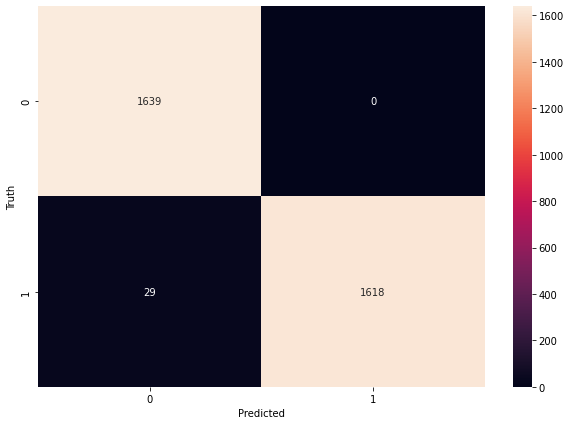

In [31]:
import seaborn as sn
import matplotlib.pyplot as plt

cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
X_test

,step,amount,type,isFlaggedFraud
3161356,237,0.000013,2,0
5474590,379,0.000194,2,0
2651427,209,0.000497,3,0
5515734,380,0.001347,3,0
3798468,281,0.002133,3,0
...,...,...,...,...
6040336,487,0.009548,3,0
6250711,596,0.001053,3,0
874075,42,0.003363,4,0
5712373,398,0.002366,3,0
